# Project - Regression Modeling with A Housing Dataset
## **Overview**
In this project ,we will be creating a linear regression model with a housing dataset for our stakeholders.

### Business Problem
**Uwezo** real estate agency deals with homeowners who are either buying or selling houses and they need to advise their clients about which home renovations increase the value of their homes.Therefore,they need actionable insights on which features of a home are more valuable to clients inorder to increase the profitability of their services.

### Data understanding
For this project,there is the ```'kc_house_data.csv``` file which contains different attributes and aspects of a home which will help us address the business problem.

* **id** - unique identified for a house
* **dateDate** - house was sold
* **pricePrice** -  is prediction target
* **bedroomsNumber** -  of Bedrooms/House
* **bathroomsNumber** -  of bathrooms/bedrooms
* **sqft_livingsquare** -  footage of the home
* **sqft_lotsquare** -  footage of the lot
* **floorsTotal** -  floors (levels) in house
* **waterfront** - House which has a view to a waterfront
* **view** - Has been viewed
* **condition** - How good the condition is ( Overall )
* **grade** - overall grade given to the housing unit, based on King County grading system
* **sqft_above** - square footage of house apart from basement
* **sqft_basement** - square footage of the basement
* **yr_built** - Built Year
* **yr_renovated** - Year when house was renovated
* **zipcode** - zip
* **lat** - Latitude coordinate
* **long** - Longitude coordinate
* **sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors
* **sqft_lot15** - The square footage of the land lots of the nearest 15 neighbors




### Data cleaning

In [61]:
#importing libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline



from statsmodels.formula.api import ols
import statsmodels.api as sm
import statsmodels.stats.api as sms
import scipy.stats as stats
from statsmodels.compat import lzip
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate,ShuffleSplit
from sklearn.feature_selection import RFECV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, mean_squared_error

In [17]:
#load 'kc_house_data.csv' as data
data=pd.read_csv('kc_house_data.csv',index_col=0)
data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,,,
7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [18]:
#getting familiar with our data
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21597 entries, 7129300520 to 1523300157
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21597 non-null  object 
 1   price          21597 non-null  float64
 2   bedrooms       21597 non-null  int64  
 3   bathrooms      21597 non-null  float64
 4   sqft_living    21597 non-null  int64  
 5   sqft_lot       21597 non-null  int64  
 6   floors         21597 non-null  float64
 7   waterfront     19221 non-null  float64
 8   view           21534 non-null  float64
 9   condition      21597 non-null  int64  
 10  grade          21597 non-null  int64  
 11  sqft_above     21597 non-null  int64  
 12  sqft_basement  21597 non-null  object 
 13  yr_built       21597 non-null  int64  
 14  yr_renovated   17755 non-null  float64
 15  zipcode        21597 non-null  int64  
 16  lat            21597 non-null  float64
 17  long           21597 non-null  float

In [19]:
data.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [20]:
data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


#### Handling missing values

In [21]:
#checking for null values
data.isnull().sum()

date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

There are 21 columns in total.Columns ```waterfront``` ,```view``` ,```yr_renovated``` have missing values

In [22]:
data["yr_renovated"].value_counts()

0.0       17011
2014.0       73
2013.0       31
2003.0       31
2007.0       30
          ...  
1951.0        1
1953.0        1
1946.0        1
1976.0        1
1948.0        1
Name: yr_renovated, Length: 70, dtype: int64

In [23]:
data["waterfront"].value_counts()

0.0    19075
1.0      146
Name: waterfront, dtype: int64

In [24]:
data["view"].value_counts()

0.0    19422
2.0      957
3.0      508
1.0      330
4.0      317
Name: view, dtype: int64

For the ```yr_renovated```column, the best way to deal with the missing values is dropping the affected rows since we can't replace years with some value(mode,median,mean)  and neither can we drop the column since we need it in our analysis.

The missing values in ```waterfront``` column will be better if we replace them with 0. In a real world concept, its either a house has a waterfront or none so it will be practical if we assume the missing values are houses with no waterfront.

As for the ```view``` column, the best way to deal with the missing values would be replace the missing values with the mode of the column since this is a categorical sort of column.This is to avoid further loss of data.



In [25]:
#Dropping affected rows in 'yr_renovated'
data=data.dropna(axis=0,subset=["yr_renovated"])

#Replacing missing values in 'waterfront'
data["waterfront"]=data["waterfront"].fillna(0)

#Replacing missing values in 'view'
data["view"]=data["view"].fillna(0.0)


In [26]:
data["view"].mode()

0    0.0
dtype: float64

In [27]:
#Confirming missing values have been dealt with
data.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

#### **Dealing with duplicates**

In [28]:
#checking for duplicates
data.duplicated().value_counts()

False    17755
dtype: int64

There are no duplicates in this dataset.

#### **Data type conversions**

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17755 entries, 7129300520 to 1523300157
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           17755 non-null  object 
 1   price          17755 non-null  float64
 2   bedrooms       17755 non-null  int64  
 3   bathrooms      17755 non-null  float64
 4   sqft_living    17755 non-null  int64  
 5   sqft_lot       17755 non-null  int64  
 6   floors         17755 non-null  float64
 7   waterfront     17755 non-null  float64
 8   view           17755 non-null  float64
 9   condition      17755 non-null  int64  
 10  grade          17755 non-null  int64  
 11  sqft_above     17755 non-null  int64  
 12  sqft_basement  17755 non-null  object 
 13  yr_built       17755 non-null  int64  
 14  yr_renovated   17755 non-null  float64
 15  zipcode        17755 non-null  int64  
 16  lat            17755 non-null  float64
 17  long           17755 non-null  float

The ```sqft_basement``` is a string data type yet it contains numerical values.Let's take a closer look

In [30]:
data["sqft_basement"].value_counts()

0.0       10546
?           366
600.0       176
500.0       170
700.0       164
          ...  
2730.0        1
2720.0        1
518.0         1
374.0         1
248.0         1
Name: sqft_basement, Length: 287, dtype: int64

In [31]:
data[data["sqft_basement"] =="?"].sample(20, random_state=1)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,,,
721049207,6/19/2014,275000.0,3,1.75,1860,15681,1.0,0.0,0.0,4,7,1860,?,1971,0.0,98023,47.3191,-122.339,1860,22979
6392001005,6/20/2014,511500.0,4,1.00,1360,6000,1.5,0.0,0.0,3,7,1360,?,1917,0.0,98115,47.6854,-122.288,1710,6000
4249000230,8/29/2014,766000.0,3,2.50,2270,9822,2.0,0.0,0.0,3,9,2270,?,1988,0.0,98052,47.6685,-122.137,2790,8089
3585210200,6/2/2014,366000.0,3,1.75,1510,8301,1.0,0.0,0.0,3,7,1510,?,1967,0.0,98034,47.7243,-122.222,1460,7910
1310960220,6/26/2014,280927.0,4,2.25,2070,7350,2.0,0.0,0.0,4,8,2070,?,1977,0.0,98032,47.3615,-122.274,2080,7210
8864000425,8/5/2014,242000.0,3,1.75,1580,6099,1.0,0.0,0.0,5,7,790,?,1944,0.0,98168,47.4807,-122.290,1330,6099
3935900232,9/29/2014,207000.0,3,1.00,920,5546,1.0,0.0,0.0,2,6,920,?,1928,0.0,98125,47.7114,-122.284,1300,5546
7939000090,9/29/2014,355000.0,4,1.75,2040,15000,1.0,0.0,0.0,4,7,1360,?,1967,0.0,98092,47.3107,-122.189,2310,15000
8682261190,1/12/2015,550285.0,2,1.75,1680,4500,1.0,0.0,0.0,3,8,1680,?,2004,0.0,98053,47.7132,-122.032,1670,4500


Interestingly, there seems to an extraneous symbol(?) in several observations.If we strip the ```?``` symbol,the affected observations will be regarded missing and we definitely don't want to create null values.So it will be better if we replace it with 0

In [32]:
data['sqft_basement'] = data['sqft_basement'].replace('?', '0.0')
data["sqft_basement"].value_counts()
data["sqft_basement"]=data["sqft_basement"].astype(float)

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17755 entries, 7129300520 to 1523300157
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           17755 non-null  object 
 1   price          17755 non-null  float64
 2   bedrooms       17755 non-null  int64  
 3   bathrooms      17755 non-null  float64
 4   sqft_living    17755 non-null  int64  
 5   sqft_lot       17755 non-null  int64  
 6   floors         17755 non-null  float64
 7   waterfront     17755 non-null  float64
 8   view           17755 non-null  float64
 9   condition      17755 non-null  int64  
 10  grade          17755 non-null  int64  
 11  sqft_above     17755 non-null  int64  
 12  sqft_basement  17755 non-null  float64
 13  yr_built       17755 non-null  int64  
 14  yr_renovated   17755 non-null  float64
 15  zipcode        17755 non-null  int64  
 16  lat            17755 non-null  float64
 17  long           17755 non-null  float

In [34]:
#looking into the date column
data["date"].value_counts()

6/23/2014    116
6/25/2014    111
4/27/2015    106
7/8/2014     104
4/28/2015    101
            ... 
5/15/2015      1
11/2/2014      1
7/4/2014       1
5/17/2014      1
8/31/2014      1
Name: date, Length: 372, dtype: int64

In [35]:
#Obtaining only the year aspect from the date so as to make it relevant and convert to interger datatype
data["date"]=data["date"].map(lambda x:x[-4:]).astype("int64")
data["date"]


id
7129300520    2014
6414100192    2014
2487200875    2014
1954400510    2015
7237550310    2014
              ... 
263000018     2014
6600060120    2015
1523300141    2014
291310100     2015
1523300157    2014
Name: date, Length: 17755, dtype: int64

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17755 entries, 7129300520 to 1523300157
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           17755 non-null  int64  
 1   price          17755 non-null  float64
 2   bedrooms       17755 non-null  int64  
 3   bathrooms      17755 non-null  float64
 4   sqft_living    17755 non-null  int64  
 5   sqft_lot       17755 non-null  int64  
 6   floors         17755 non-null  float64
 7   waterfront     17755 non-null  float64
 8   view           17755 non-null  float64
 9   condition      17755 non-null  int64  
 10  grade          17755 non-null  int64  
 11  sqft_above     17755 non-null  int64  
 12  sqft_basement  17755 non-null  float64
 13  yr_built       17755 non-null  int64  
 14  yr_renovated   17755 non-null  float64
 15  zipcode        17755 non-null  int64  
 16  lat            17755 non-null  float64
 17  long           17755 non-null  float

### **Feature engineering**

Inorder to enhance the performance of our model,we will need to manipulate and select our raw data into useful features for this business problem

In [37]:
#Obtaining Age of the home before it was sold
data["house_age"]=data["date"]-data["yr_built"]
data["house_age"].value_counts()

 9      396
 8      370
 10     359
 0      356
 11     355
       ... 
 112     22
 115     18
 81      17
 80      15
-1        6
Name: house_age, Length: 117, dtype: int64

In [38]:
data[data["house_age"] < 0].sample(5, random_state=1)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,house_age
id,,,,,,,,,,,,,,,,,,,,,
9126100765,2014,455000.0,3,1.75,1320,1014,3.0,0.0,0.0,3,...,1320,0.0,2015,0.0,98122,47.6047,-122.305,1380,1495,-1
9126100346,2014,350000.0,3,2.00,1380,3600,3.0,0.0,0.0,3,...,1380,0.0,2015,0.0,98122,47.6074,-122.305,1480,3600,-1
1257201420,2014,595000.0,4,3.25,3730,4560,2.0,0.0,0.0,3,...,2760,970.0,2015,0.0,98103,47.6725,-122.330,1800,4560,-1
9520900210,2014,614285.0,5,2.75,2730,6401,2.0,0.0,0.0,3,...,2730,0.0,2015,0.0,98072,47.7685,-122.160,2520,6126,-1
9310300160,2014,357000.0,5,2.50,2990,9240,2.0,0.0,0.0,3,...,2990,0.0,2015,0.0,98133,47.7384,-122.348,1970,18110,-1


There home ages with a negative value,this could only mean that the house was sold before it was actually built which is quite interesting.

After using the ```date``` and ```yr_built``` columns to calculate home age we can now drop them.

In [39]:
data=data.drop(columns=["date","yr_built"])
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,house_age
id,,,,,,,,,,,,,,,,,,,
7129300520,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,7,1180,0.0,0.0,98178,47.5112,-122.257,1340,5650,59
6414100192,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1991.0,98125,47.7210,-122.319,1690,7639,63
2487200875,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,0.0,98136,47.5208,-122.393,1360,5000,49
1954400510,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,0.0,98074,47.6168,-122.045,1800,7503,28
7237550310,1230000.0,4,4.50,5420,101930,1.0,0.0,0.0,3,11,3890,1530.0,0.0,98053,47.6561,-122.005,4760,101930,13


Some of the features present in this dataset are irrelevant to this particular business problem,so we will drop them

In [40]:
data.drop(['lat', 'long', 'zipcode', 'sqft_above','yr_renovated', 'sqft_living15','sqft_lot15' ], axis=1, inplace=True)
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_basement,house_age
id,,,,,,,,,,,,
7129300520,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,7,0.0,59
6414100192,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,400.0,63
2487200875,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,910.0,49
1954400510,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,0.0,28
7237550310,1230000.0,4,4.50,5420,101930,1.0,0.0,0.0,3,11,1530.0,13


### Check For Multicollinearity

It is very important for predictor variables not to be high correlated amongst each other as this enables us to differentiate effects of each predictor on the target.Therefore,we divide the data into dependent and independent variables.

In [41]:
X = data.drop('price',axis=1)
y=data['price']

In [42]:
X

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_basement,house_age
id,,,,,,,,,,,
7129300520,3,1.00,1180,5650,1.0,0.0,0.0,3,7,0.0,59
6414100192,3,2.25,2570,7242,2.0,0.0,0.0,3,7,400.0,63
2487200875,4,3.00,1960,5000,1.0,0.0,0.0,5,7,910.0,49
1954400510,3,2.00,1680,8080,1.0,0.0,0.0,3,8,0.0,28
7237550310,4,4.50,5420,101930,1.0,0.0,0.0,3,11,1530.0,13
...,...,...,...,...,...,...,...,...,...,...,...
263000018,3,2.50,1530,1131,3.0,0.0,0.0,3,8,0.0,5
6600060120,4,2.50,2310,5813,2.0,0.0,0.0,3,8,0.0,1
1523300141,2,0.75,1020,1350,2.0,0.0,0.0,3,7,0.0,5


In [43]:
#Finding correlated independent variables
X.corr()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_basement,house_age
bedrooms,1.000000,0.511491,0.574782,0.029773,0.176505,-0.003520,0.074623,0.021365,0.353471,0.297709,-0.152097
bathrooms,0.511491,1.000000,0.753997,0.085359,0.502249,0.065033,0.180650,-0.129826,0.664770,0.276838,-0.505851
sqft_living,0.574782,0.753997,1.000000,0.168154,0.355168,0.108665,0.279821,-0.064484,0.763987,0.431187,-0.316259
sqft_lot,0.029773,0.085359,0.168154,1.000000,-0.008659,0.024356,0.078114,-0.009637,0.108794,0.019554,-0.048669
floors,0.176505,0.502249,0.355168,-0.008659,1.000000,0.017805,0.025861,-0.263046,0.459814,-0.241933,-0.487248
waterfront,-0.003520,0.065033,0.108665,0.024356,0.017805,1.000000,0.384150,0.016075,0.080648,0.084284,0.021968
view,0.074623,0.180650,0.279821,0.078114,0.025861,0.384150,1.000000,0.044075,0.247894,0.264060,0.055249
condition,0.021365,-0.129826,-0.064484,-0.009637,-0.263046,0.016075,0.044075,1.000000,-0.149679,0.162654,0.365267
grade,0.353471,0.664770,0.763987,0.108794,0.459814,0.080648,0.247894,-0.149679,1.000000,0.166621,-0.445470
sqft_basement,0.297709,0.276838,0.431187,0.019554,-0.241933,0.084284,0.264060,0.162654,0.166621,1.000000,0.129594


<AxesSubplot:>

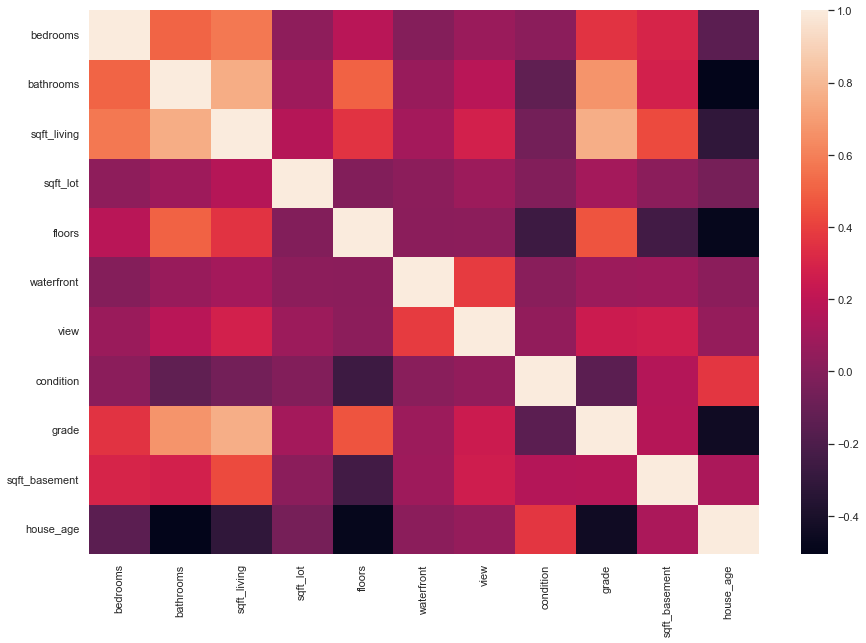

In [44]:
#Inspecting correlation visually
sns.set(rc={'figure.figsize':(15,10)})
sns.heatmap(X.corr())

In [45]:
#Pairs of highly correlated independent variables
df = data.corr().abs().stack().reset_index().sort_values(0, ascending=False)

df['pairs'] = list(zip(df.level_0, df.level_1))

df.set_index(['pairs'], inplace = True)

df.drop(columns=['level_1', 'level_0'], inplace = True)

# cc for correlation coefficient
df.columns = ['cc']

df.drop_duplicates(inplace=True)

df[(df.cc>.75) & (df.cc<1)]

,cc
pairs,
"(sqft_living, grade)",0.763987
"(bathrooms, sqft_living)",0.753997


The two sets of variables are highly correlated.
As for the first pair,we can drop the ```grade``` feature since there is the ```condition``` feature which is relatively not very different from ```grade``` feature.
Although,for the second pair we need both the independent variables for our analysis so we won't drop either but keep this correlation in mind.


In [46]:
data.drop(['grade'], axis=1, inplace=True)
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_basement,house_age
id,,,,,,,,,,,
7129300520,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,0.0,59
6414100192,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,400.0,63
2487200875,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,910.0,49
1954400510,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,0.0,28
7237550310,1230000.0,4,4.50,5420,101930,1.0,0.0,0.0,3,1530.0,13


### **Feature normalization**

Let us have a look at the distribution of our data

C:\Users\user\AppData\Local\Temp/ipykernel_16284/2952110290.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  data.hist(ax = ax)


array([[<AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'bedrooms'}>,
        <AxesSubplot:title={'center':'bathrooms'}>],
       [<AxesSubplot:title={'center':'sqft_living'}>,
        <AxesSubplot:title={'center':'sqft_lot'}>,
        <AxesSubplot:title={'center':'floors'}>],
       [<AxesSubplot:title={'center':'waterfront'}>,
        <AxesSubplot:title={'center':'view'}>,
        <AxesSubplot:title={'center':'condition'}>],
       [<AxesSubplot:title={'center':'sqft_basement'}>,
        <AxesSubplot:title={'center':'house_age'}>, <AxesSubplot:>]],
      dtype=object)

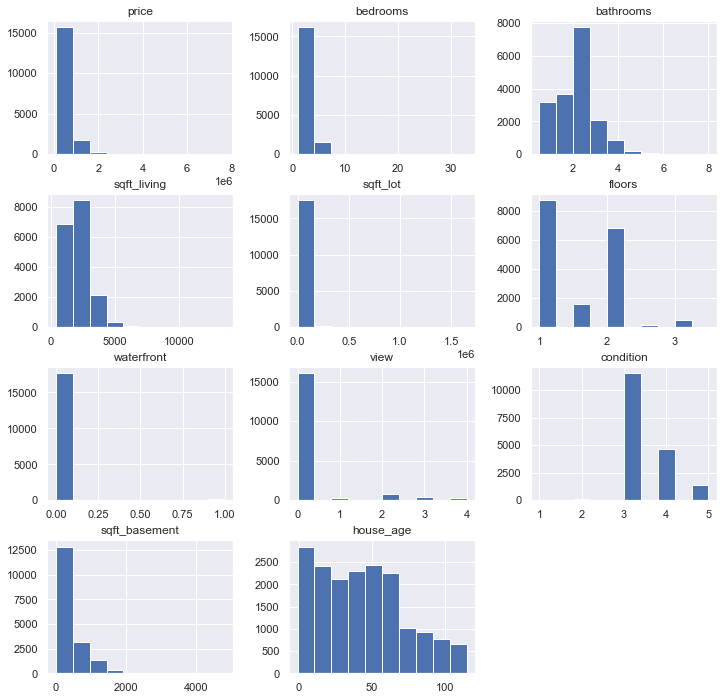

In [47]:
fig = plt.figure(figsize = (12,12))
ax = fig.gca()
data.hist(ax = ax)

Most of the distributions are non-normal so we can perform log transformations where it makes sense so as to normalize the data 

In [48]:
continuous = ['price', 'sqft_living', 'sqft_lot']
data_cont = data[continuous]

array([[<AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'sqft_living'}>],
       [<AxesSubplot:title={'center':'sqft_lot'}>, <AxesSubplot:>]],
      dtype=object)

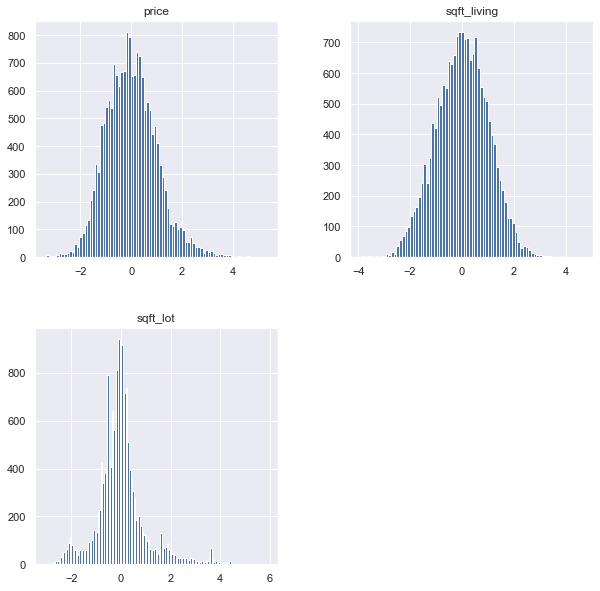

In [49]:
import warnings
warnings.filterwarnings("ignore")

#log transformation
log_names = [f'{column}' for column in data_cont.columns]

data_log = np.log(data_cont)
data_log.columns = log_names


# normalize (subract mean and divide by std)

def normalize(feature):
    return (feature - feature.mean()) / feature.std()

normal_data = data_log.apply(normalize)
normal_data.hist(figsize=(10,10), bins='auto')




### **Data modelling**

In [51]:
#Obtaining a copy of the data with the normal distributions
data_copy=data.copy()
data_copy=data_copy.drop(data_cont,axis=1)
data_copy=pd.concat([data_copy,normal_data],axis=1)
data_copy.head()


,bedrooms,bathrooms,floors,waterfront,view,condition,sqft_basement,house_age,price,sqft_living,sqft_lot
id,,,,,,,,,,,
7129300520,3,1.00,1.0,0.0,0.0,3,0.0,59,-1.405659,-1.132864,-0.390137
6414100192,3,2.25,2.0,0.0,0.0,3,400.0,63,0.278803,0.705357,-0.116149
2487200875,4,3.00,1.0,0.0,0.0,5,910.0,49,0.498893,0.065464,-0.525031
1954400510,3,2.00,1.0,0.0,0.0,3,0.0,28,0.177146,-0.298572,0.004701
7237550310,4,4.50,1.0,0.0,0.0,3,1530.0,13,1.851579,2.467532,2.802501


In [52]:
from sklearn.model_selection import train_test_split

#split data into dependent feature & independent feature
X = data_copy.drop('price',axis=1)
y=data_copy['price']

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size = 0.30, random_state = 10 )

In [53]:
x_train.head()

,bedrooms,bathrooms,floors,waterfront,view,condition,sqft_basement,house_age,sqft_living,sqft_lot
id,,,,,,,,,,
832700320,3,2.50,3.0,0.0,0.0,3,0.0,6,-0.582002,-1.299823
1250201640,3,2.00,1.5,0.0,3.0,4,940.0,109,0.677628,-0.122569
7379700051,3,1.75,1.0,0.0,0.0,3,0.0,52,-0.428599,0.670170
1326059142,4,3.00,2.0,0.0,2.0,4,0.0,33,1.448199,3.058186
7230900120,3,2.50,1.0,0.0,0.0,3,850.0,35,0.272955,-0.056956


In [54]:
y_train.head()

id
832700320    -0.549810
1250201640    0.973038
7379700051   -0.407687
1326059142    2.097807
7230900120   -0.594324
Name: price, dtype: float64

In [55]:
#let's look at correlation with our target variable'price'
price_corr=data_copy.corr()["price"].map(abs).sort_values(ascending=False)
price_corr

price            1.000000
sqft_living      0.675815
bathrooms        0.551019
view             0.343676
bedrooms         0.342040
sqft_basement    0.312544
floors           0.310269
waterfront       0.170675
sqft_lot         0.137899
house_age        0.076597
condition        0.035113
Name: price, dtype: float64

**Model 1**

For our initial model,we will build a model with the most correlated variable to ```price``` which happens to be ```sqft_living ``` but first lets see this relatioship visually using a sctter plot.

Text(0, 0.5, 'price')

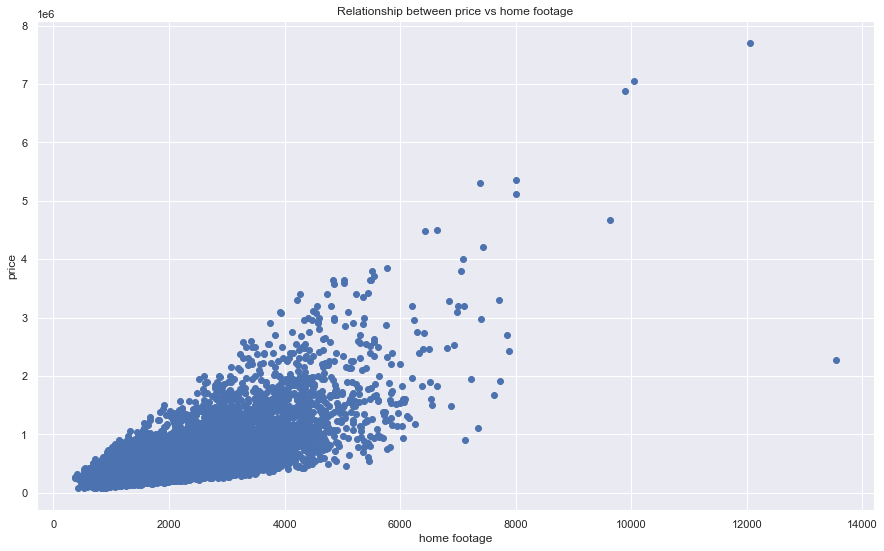

In [172]:
fig,ax=plt.subplots(figsize=(15,9))
x = data['sqft_living']
y = data["price"]
ax.scatter(x,y)
ax.set_title("Relationship between price vs home footage")
ax.set_xlabel("home footage")
ax.set_ylabel("price")

Generally,It seems that the larger the home area, the more pricey a house is.
Roughly,many homes have a home footage of between 400 to 5000 

In [74]:
#fitting our model
from statsmodels.formula.api import ols
import statsmodels.api as sm
x_train1=x_train["sqft_living"]
x_test1=x_test["sqft_living"]
model_1=sm.OLS(y_train, sm.add_constant(x_train1)).fit().summary()
model_1

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.451
Model:                            OLS   Adj. R-squared:                  0.451
Method:                 Least Squares   F-statistic:                 1.021e+04
Date:                Mon, 04 Jul 2022   Prob (F-statistic):               0.00
Time:                        13:10:10   Log-Likelihood:                -13804.
No. Observations:               12428   AIC:                         2.761e+04
Df Residuals:                   12426   BIC:                         2.763e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0017      0.007      0.254      0.800      -0.011       0.015
sqft_living     0.6707      0.007    101.035      0.000       0.658       0.684
==============================================================================
Omnibus:                       72.762   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               65.811
Skew:                           0.137   Prob(JB):                     5.12e-15
Kurtosis:                       2.772   Cond. No.                         1.01
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The R squared of the model is not quite good<br> 
The p_value for the ```const``` feature is higher than 0.05(alpha) which means that it is not quite significant in relation to the target(price)<br>
The co-efficients are relatively small which is good meaning our features are scaled


**Model 2**

In [65]:
x_train2 = x_train
x_test2= x_test

In [67]:
predictors = sm.add_constant(x_train2)
model_2=sm.OLS(y_train, predictors).fit().summary()
model_2

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.556
Model:                            OLS   Adj. R-squared:                  0.555
Method:                 Least Squares   F-statistic:                     1553.
Date:                Mon, 04 Jul 2022   Prob (F-statistic):               0.00
Time:                        12:57:07   Log-Likelihood:                -12489.
No. Observations:               12428   AIC:                         2.500e+04
Df Residuals:                   12417   BIC:                         2.508e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.8992      0.056    -16.100      0.000      -1.009      -0.790
bedrooms         -0.1359      0.008    -16.726      0.000      -0.152      -0.120
bathrooms         0.2290      0.014     16.593      0.000       0.202       0.256
floors            0.1878      0.017     11.345      0.000       0.155       0.220
waterfront        0.6398      0.076      8.412      0.000       0.491       0.789
view              0.1750      0.009     19.408      0.000       0.157       0.193
condition         0.0531      0.010      5.369      0.000       0.034       0.072
sqft_basement -7.328e-05   1.82e-05     -4.032      0.000      -0.000   -3.77e-05
house_age         0.0090      0.000     33.682      0.000       0.008       0.009
sqft_living       0.6755      0.012     56.801      0.000       0.652       0.699
sqft_lot         -0.0769      0.007    -10.648      0.000      -0.091      -0.063
==============================================================================
Omnibus:                       10.922   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               12.373
Skew:                           0.003   Prob(JB):                      0.00206
Kurtosis:                       3.154   Cond. No.                     6.76e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.76e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

For the second model,I used all the features present to build a model<br>
The R squared has improved from our first model which is a good sign that addition of features has a positive effect on our model.<br>
The p_values are 0 which is an indicator that all the above features have a significant effect on the target ```price```<br>
The overall p_value for the whole model is 0.00 which is less than 0.05 meaning the model was statistically significant at an alpha level of 0.05.
The model summary suggests there might be strong collinearity let's take a look.

In [90]:
#checking for high multicollinearity using the Variance Inflation Factor method
vif = [variance_inflation_factor(x_train2.values, i) for i in range(x_train2.shape[1])]
pd.Series(vif, index=x_train2.columns, name="Variance Inflation Factor")

bedrooms         19.192554
bathrooms        23.635773
floors           15.266643
waterfront        1.203777
view              1.443719
condition        23.678420
sqft_basement     2.526986
house_age         5.320717
sqft_living       2.625692
sqft_lot          1.370605
Name: Variance Inflation Factor, dtype: float64

The multicollinearity threshold is a value less 5,the only features that respect this condition are ```waterfront```,```view```, ```sqft_basement``` ,```house_age```,```sqft_living```,```sqft_lot```

In [88]:
model_2 = LinearRegression()
#fit linear model
print(model_2.fit(x_train, y_train))

#Obtaining the training score
print(f"Training score :{model_2.score(x_train, y_train)}")

# getting the test score
print(f"Test score : {model_2.score(x_test, y_test)}")



LinearRegression()
Training score :0.5557005226909271
Test score : 0.567288215908156


The test data performed better than the training data which means that our model is not overfitted.

**Model 3**


For this model,I will use all features expect ```condition``` and ```bathrooms``` which have high multicollinearity.


In [146]:
features=["waterfront","view", "sqft_basement" ,"house_age","sqft_living","sqft_lot"]
x_train3 =  x_train[features]
x_test3= x_test[features]


In [147]:
predictors2 = sm.add_constant(x_train3)
model_3=sm.OLS(y_train, predictors2).fit().summary()
model_3

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.528
Model:                            OLS   Adj. R-squared:                  0.528
Method:                 Least Squares   F-statistic:                     2317.
Date:                Mon, 04 Jul 2022   Prob (F-statistic):               0.00
Time:                        14:55:49   Log-Likelihood:                -12863.
No. Observations:               12428   AIC:                         2.574e+04
Df Residuals:                   12421   BIC:                         2.579e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.2922      0.012    -25.384      0.000      -0.315      -0.270
waterfront        0.7285      0.078      9.304      0.000       0.575       0.882
view              0.2030      0.009     22.015      0.000       0.185       0.221
sqft_basement    -0.0002   1.63e-05     -9.998      0.000      -0.000      -0.000
house_age         0.0067      0.000     28.032      0.000       0.006       0.007
sqft_living       0.7722      0.008     95.043      0.000       0.756       0.788
sqft_lot         -0.1346      0.007    -20.516      0.000      -0.147      -0.122
==============================================================================
Omnibus:                       13.527   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               12.170
Skew:                          -0.033   Prob(JB):                      0.00228
Kurtosis:                       2.861   Cond. No.                     6.75e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.75e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [148]:
model_3 = LinearRegression()
#fit linear model
print(model_3.fit(x_train3, y_train))

#Obtaining the training score
print(f"Training score :{model_3.score(x_train3, y_train)}")

# getting the test score
print(f"Test score : {model_3.score(x_test3, y_test)}")


LinearRegression()
Training score :0.5281308967488536
Test score : 0.538309524737153


In general,the second model is better than this model.Starting from the r-squared value to the performance of the test and train data.


**Model 4**<br>
Here I will use that are the most correlated to price.

In [149]:
price_corr=data_copy.corr()["price"].map(abs).sort_values(ascending=False)
price_corr

price            1.000000
sqft_living      0.675815
bathrooms        0.551019
view             0.343676
bedrooms         0.342040
sqft_basement    0.312544
floors           0.310269
waterfront       0.170675
sqft_lot         0.137899
house_age        0.076597
condition        0.035113
Name: price, dtype: float64

In [150]:
features=["bathrooms","view", "sqft_basement" ,"bedrooms","sqft_living"]
x_train4 =  x_train[features]
x_test4= x_test[features]


In [151]:
predictors3 = sm.add_constant(x_train4)
model_4=sm.OLS(y_train, predictors3).fit().summary()
model_4

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.495
Model:                            OLS   Adj. R-squared:                  0.495
Method:                 Least Squares   F-statistic:                     2435.
Date:                Mon, 04 Jul 2022   Prob (F-statistic):               0.00
Time:                        15:33:50   Log-Likelihood:                -13286.
No. Observations:               12428   AIC:                         2.658e+04
Df Residuals:                   12422   BIC:                         2.663e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0221      0.039      0.572      0.567      -0.054       0.098
bathrooms         0.1323      0.013     10.372      0.000       0.107       0.157
view              0.2367      0.009     26.911      0.000       0.219       0.254
sqft_basement  2.113e-05   1.61e-05      1.313      0.189   -1.04e-05    5.27e-05
bedrooms         -0.1071      0.009    -12.502      0.000      -0.124      -0.090
sqft_living       0.6092      0.011     54.404      0.000       0.587       0.631
==============================================================================
Omnibus:                       51.410   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               44.684
Skew:                           0.095   Prob(JB):                     1.98e-10
Kurtosis:                       2.776   Cond. No.                     3.40e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.4e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### **Conclusion**<br>
The second model is the one that performs better than any other model.<BR>The model 2 contains the following independent variables:
     ```bedrooms```, ```bathrooms```, ```floors```, ```waterfront```, ```view```, ```condition```,
       ```sqft_basement```, ```house_age```, ```sqft_living```, ```sqft_lot```

### Visualizations
Let us take a closer visual look at how the above features affect the price of a house.

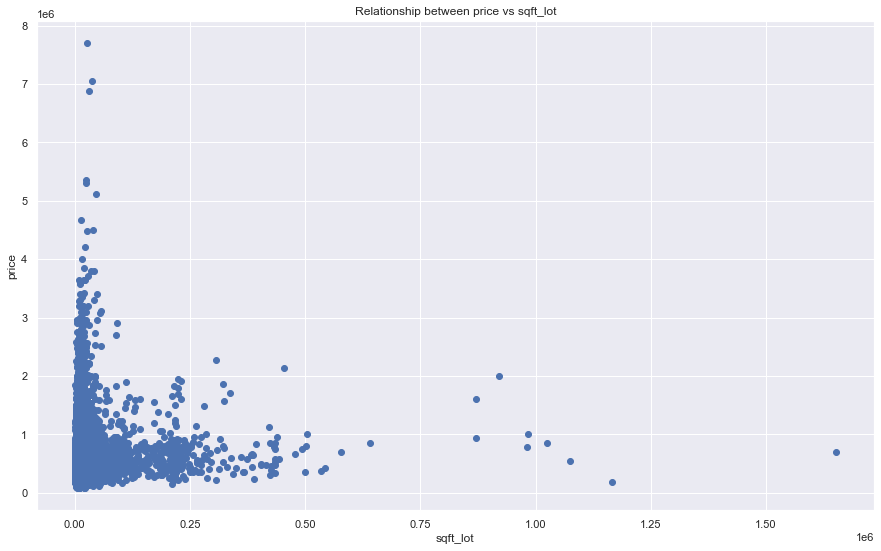

In [190]:
def visual(dataframe,x_axis,y_axis):
    fig,ax=plt.subplots(figsize=(15,9))
    x=dataframe[x_axis]
    y=dataframe[y_axis]
    ax.scatter(x,y)
    ax.set_title(f"Relationship between price vs {x_axis}")
    ax.set_xlabel(f"{x_axis}")
    ax.set_ylabel("price")
    
visual(data,"sqft_lot","price")

From the above observations, it seems that houses with a relatively smaller lot area are the ones going for the highest prices.<BR>Most houses have a smaller lot area.


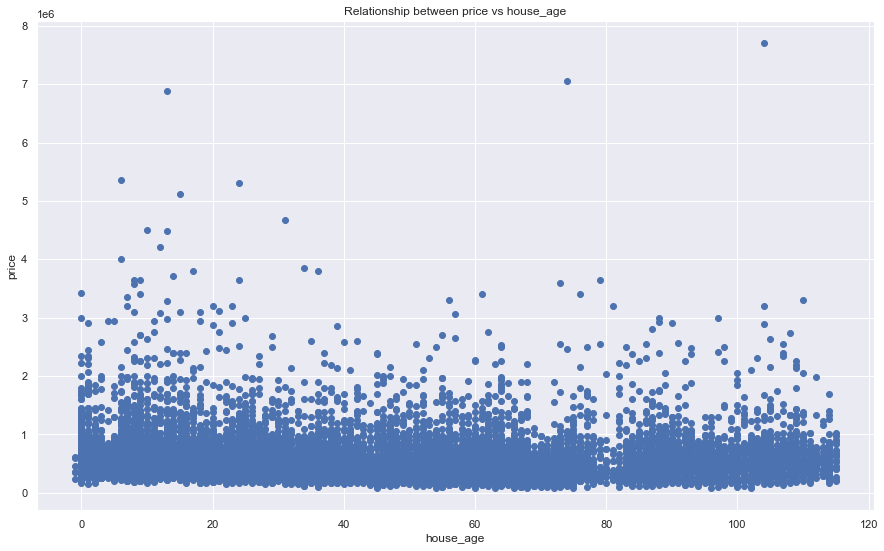

In [182]:
visual(data,"house_age","price")

Generally,all houses seem to have a relatively same price regardless of its age but most of the pricey houses are not that old.

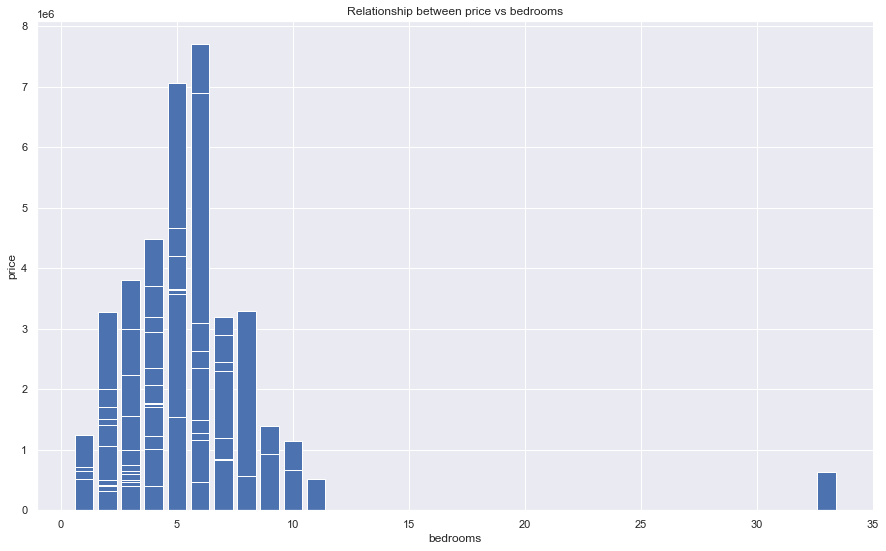

In [194]:
def visually(dataframe,x_axis,y_axis):
    fig,ax=plt.subplots(figsize=(15,9))
    x=dataframe[x_axis]
    height=dataframe[y_axis]
    ax.bar(x,height)
    ax.set_title(f"Relationship between price vs {x_axis}")
    ax.set_xlabel(f"{x_axis}")
    ax.set_ylabel("price")
    
visually(data,"bedrooms","price")

The houses with the most value have around 5 to 6 bedrooms.

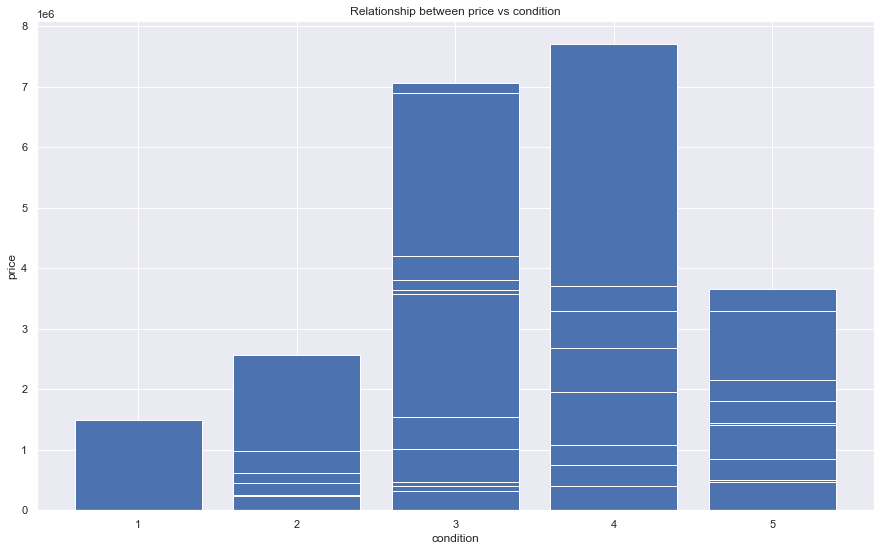

In [198]:
visually(data,"condition","price")

Houses with the highest prices are at condition 4.This means the house is in good condition- No obvious maintenance required but neither is everything new. Appearance and utility are above the standard .